# Homework -2 
# MULTIPLE REGRESSION

In [99]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib as ml
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [84]:

data_df = pd.read_csv('data.csv')

In [85]:
data_df.head()

,Hour,CO,Traffic,Wind
0,1,2.4,50,-0.2
1,2,1.7,26,0.0
2,3,1.4,16,0.0
3,4,1.2,10,0.0
4,5,1.2,12,0.1


# 1. Find the correlation and plot the scatter plot of (Y and H), (Y and T), (Y and W)

In [86]:
Y = data_df.CO
H = data_df.Hour
T = data_df.Traffic
W = data_df.Wind

In [212]:
print "\n The Correlation between H and Y is 42.83%"
print np.corrcoef(H,Y)

print "\n The Correlation between T and Y is 96.26%"
print np.corrcoef(T,Y)

print "\n The Correlation between W and Y is 70.97%"
print np.corrcoef(W,Y)


 The Correlation between H and Y is 42.83%
[[ 1.          0.42835141]
 [ 0.42835141  1.        ]]

 The Correlation between T and Y is 96.26%
[[ 1.          0.96266546]
 [ 0.96266546  1.        ]]

 The Correlation between W and Y is 70.97%
[[ 1.          0.70974865]
 [ 0.70974865  1.        ]]


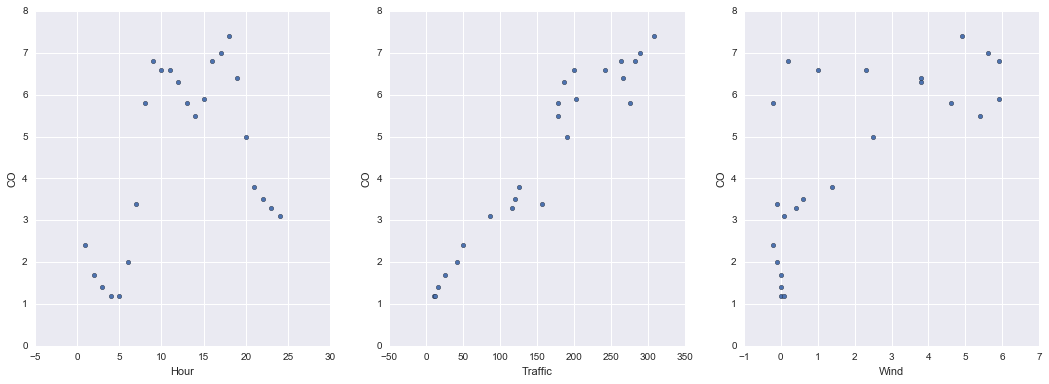

In [145]:
fig, axs = plt.subplots(1,3)
data_df.plot(kind = "scatter", x = 'Hour', y = 'CO', ax = axs[0], figsize=(18,6))
data_df.plot(kind = 'scatter', x = 'Traffic', y = 'CO', ax = axs[1])
data_df.plot(kind = 'scatter', x = 'Wind', y = 'CO', ax = axs[2])

# 2.

In [168]:
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(H,Y)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(T,Y)
slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(W,Y)

print "R^2 for H and Y is: ", r_value1**2
print "R^2 for T and Y is: ", r_value2**2
print "R^2 for W and Y is: ", r_value3**2

R^2 for H and Y is:  0.183484932457
R^2 for T and Y is:  0.92672478996
R^2 for W and Y is:  0.503743142976


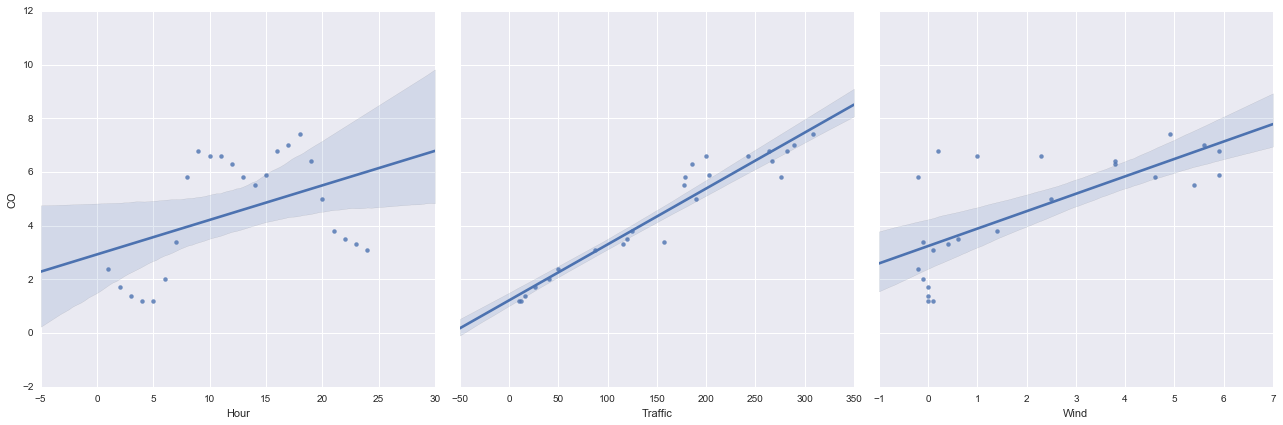

In [144]:
g = sns.PairGrid(data_df, y_vars=["CO"], x_vars=["Hour", "Traffic", "Wind"], size=6)
g.map(sns.regplot)

# 3.

In [125]:
print np.corrcoef(T,H)
print 'Correlation Between T and H is 42.85%'
print np.corrcoef(W,T)
print 'Correlation Between W and T is 61.34%'
print np.corrcoef(H,W)
print 'Correlation Between H and W is 42.26%'

[[ 1.          0.42852285]
 [ 0.42852285  1.        ]]
Correlation Between T and H is 42.85%
[[ 1.          0.61344359]
 [ 0.61344359  1.        ]]
Correlation Between W and T is 61.34%
[[ 1.          0.42263809]
 [ 0.42263809  1.        ]]
Correlation Between H and W is 42.26%


# 4. 

In [201]:
# Y = Y , X = T,H
Y = data_df['CO']
X1 = data_df[['Traffic', 'Hour']]
X2 = data_df[['Wind', 'Traffic']]
X3 = data_df[['Hour', 'Wind']]
X = data_df[['Hour', 'Traffic', 'Wind']]

# Traffic and Hour

In [178]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula='CO ~ Hour+Traffic', data=data_df).fit()

In [185]:
print "Coefficients of the model: "
print lm1.params

Coofficients of the model: 
Intercept    1.175000
Hour         0.005815
Traffic      0.020647
dtype: float64


In [186]:
print "Confidence Interval: "
print lm1.conf_int()

Confidence Interval: 
                  0         1
Intercept  0.593308  1.756692
Hour      -0.034879  0.046509
Traffic    0.017712  0.023583


In [187]:
print "R-squared: "
print lm1.rsquared

R-squared: 
0.927031639809


In [188]:
print "Predictions of CO using model i.e due to regression: "
print lm1.predict(X1)

Predictions of CO using model i.e due to regression: 
[ 2.21318299  1.72346137  1.52280278  1.40473362  1.45184334  2.05643174
  4.45734036  6.92019105  7.0498902   6.22981084  5.36843677  5.08518874
  4.94647222  4.93163986  5.45363882  6.71894271  7.24094167  7.63905648
  6.79832977  5.21429814  3.87803481  3.78061301  3.70383857  3.11088016]


# wind and aTraffic

In [189]:
lm2 = smf.ols(formula='CO ~ Wind+Traffic', data=data_df).fit()

In [190]:
print "Coofficients of the model: "
print lm2.params

Coofficients of the model: 
Intercept    1.274461
Wind         0.174747
Traffic      0.018290
dtype: float64


In [191]:
print "Confidence Interval: "
print lm2.conf_int()

Confidence Interval: 
                  0         1
Intercept  0.862413  1.686510
Wind       0.056697  0.292797
Traffic    0.015497  0.021084


In [192]:
print "R-squared: "
print lm2.rsquared

R-squared: 
0.949509414529


In [194]:
print "Predictions of CO using model i.e due to regression: "
print lm2.predict(X2)

Predictions of CO using model i.e due to regression: 
[ 2.15403275  1.75001201  1.56710781  1.45736529  1.5114208   2.00689364
  4.12858237  6.28766769  6.4673089   5.87548946  5.33446254  5.34051672
  5.35228115  5.4737881   6.01842196  7.13413758  7.53897407  7.76416936
  6.82204075  5.18650768  3.805409    3.57415953  3.46604851  2.88320231]


# Hour and Wind

In [195]:
lm3 = smf.ols(formula='CO ~ Hour+Wind', data=data_df).fit()

In [196]:
print "Coofficients of the model: "
print lm3.params

Coofficients of the model: 
Intercept    2.776934
Hour         0.046881
Wind         0.588501
dtype: float64


In [198]:
print "Confidence Interval: "
print lm3.conf_int()

Confidence Interval: 
                  0         1
Intercept  1.432270  4.121597
Hour      -0.056757  0.150520
Wind       0.272591  0.904411


In [199]:
print "R-squared: "
print lm3.rsquared

R-squared: 
0.523810181436


In [200]:
print "Predictions of CO using model i.e due to regression: "
print lm3.predict(X3)

Predictions of CO using model i.e due to regression: 
[ 2.70611473  2.87069625  2.91757757  2.96445888  3.0701903   2.99937142
  3.04625274  3.03428395  3.31656567  3.83424779  4.64618041  5.57581323
  6.09349535  6.61117747  6.95230929  6.99919061  6.86952163  6.50445224
  5.90398246  5.18581247  4.58534268  4.1614232   4.09060432  3.96093533]


# 5


In [202]:
lm = smf.ols(formula='CO ~ Hour+Traffic+Wind', data=data_df).fit()

In [203]:
print "Coofficients of the model: "
print lm.params

Coofficients of the model: 
Intercept    1.318967
Hour        -0.005689
Traffic      0.018402
Wind         0.179189
dtype: float64


In [204]:
print "Confidence Interval: "
print lm.conf_int()

Confidence Interval: 
                  0         1
Intercept  0.813076  1.824858
Hour      -0.041289  0.029911
Traffic    0.015455  0.021349
Wind       0.055038  0.303340


In [205]:
print "R-squared: "
print lm.rsquared

R-squared: 
0.949788420165


In [206]:
print "Predictions of CO using model i.e due to regression: "
print lm.predict(X)

Predictions of CO using model i.e due to regression: 
[ 2.19752889  1.78603442  1.59632719  1.48022712  1.52926028  2.02138505
  4.15030336  6.31650814  6.49290518  5.89449551  5.34887679  5.35434601
  5.36319541  5.48245555  6.02640551  7.14322537  7.54382407  7.76233641
  6.80506571  5.14949276  3.7505791   3.50952957  3.39439527  2.80129731]
